# Первичная подготовка данных(визуализация)

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso,Ridge,LassoCV,RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [172]:
data = pd.read_csv('https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/bikes_rent.csv')
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,10.486773,2114
727,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,4.656485,3095
728,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,3.725374,1341
729,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,10.505372,1796


In [173]:
data.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.310776,23.717699,62.789406,12.762576,5.705220,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.505091,8.148059,14.242910,5.192357,2.321125,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,0.670650,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.820424,16.892125,52.000000,9.041650,4.041864,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.666700,12.125325,5.420351,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,73.020850,15.625371,6.984967,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,15.198937,8714.000000


In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


In [175]:
data.isnull().sum()

season            0
yr                0
mnth              0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed(mph)    0
windspeed(ms)     0
cnt               0
dtype: int64

<AxesSubplot:>

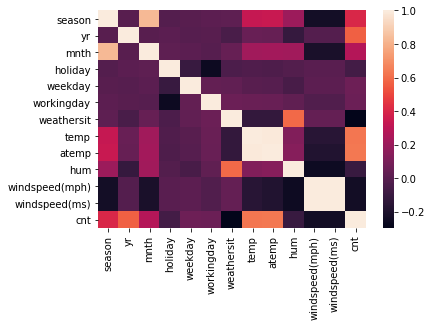

In [176]:
sns.heatmap(data.corr())

In [177]:
data.shape

(731, 13)

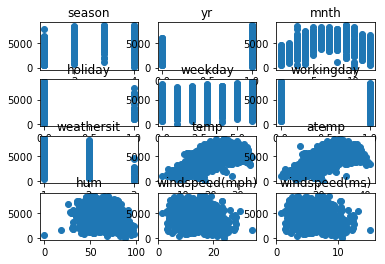

In [178]:
for i,col in enumerate(data.columns[:-1]) :
    plt.subplot(4,3,i+1)
    plt.scatter(data[col], data['cnt'])
    plt.title(col)

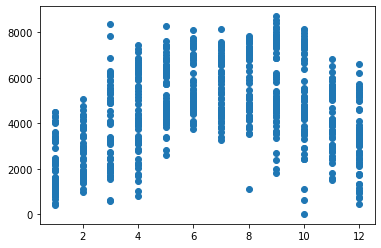

In [179]:
plt.scatter(data.mnth, data.cnt);

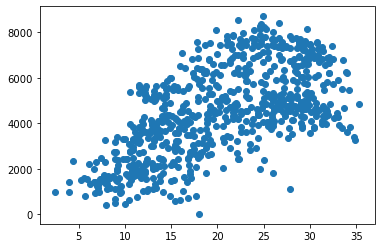

In [180]:
plt.scatter(data.temp, data.cnt);

In [181]:
linreg = LinearRegression()
lasso = Lasso(random_state=17)
ridge = Ridge(random_state=17)
lasso_cv = LassoCV(random_state=17)
ridge_cv = RidgeCV()
forest = RandomForestRegressor(random_state=17,n_jobs=-1,n_estimators=500)

In [182]:
X , y = data.drop('cnt',axis =1).values ,  data.cnt.values

In [183]:
train_part_size = int(.7*X.shape[0])

X_train , X_valid = X[:train_part_size, :] , X[train_part_size:, :]
y_train , y_valid = y[:train_part_size] , y[train_part_size:]

In [184]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_valid_scaler = scaler.transform(X_valid)

In [185]:
pd.DataFrame(X_train_scaler)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.107401,-0.632456,-1.315274,-0.167836,1.5,-1.481131,1.064463,-0.682435,-0.534007,1.172487,-0.457752,-0.457752
1,-1.107401,-0.632456,-1.315274,-0.167836,-1.5,-1.481131,1.064463,-0.574279,-0.595785,0.451962,0.666032,0.666032
2,-1.107401,-0.632456,-1.315274,-0.167836,-1.0,0.675160,-0.736665,-1.510240,-1.622711,-1.247254,0.663098,0.663098
3,-1.107401,-0.632456,-1.315274,-0.167836,-0.5,0.675160,-0.736665,-1.489876,-1.480752,-0.241685,-0.459665,-0.459665
4,-1.107401,-0.632456,-1.315274,-0.167836,0.0,0.675160,-0.736665,-1.338897,-1.373594,-1.249329,-0.120284,-0.120284
...,...,...,...,...,...,...,...,...,...,...,...,...
506,-0.184266,1.581139,-0.145378,-0.167836,-1.0,0.675160,1.064463,0.741082,0.728558,1.208052,0.470407,0.470407
507,-0.184266,1.581139,-0.145378,-0.167836,-0.5,0.675160,1.064463,0.834430,0.823281,0.909872,-0.997096,-0.997096
508,-0.184266,1.581139,-0.145378,-0.167836,0.0,0.675160,1.064463,0.871770,0.846946,0.967319,-1.203335,-1.203335
509,-0.184266,1.581139,-0.145378,-0.167836,0.5,0.675160,-0.736665,1.058459,0.984974,0.587077,-0.298930,-0.298930


In [186]:
pd.DataFrame(X_valid_scaler)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.184266,1.581139,-0.145378,-0.167836,1.5,-1.481131,-0.736665,1.268487,1.209914,0.691027,0.033971,0.033971
1,-0.184266,1.581139,-0.145378,-0.167836,-1.5,-1.481131,-0.736665,1.254485,1.201971,0.458501,0.240363,0.240363
2,-0.184266,1.581139,-0.145378,5.958188,-1.0,-1.481131,-0.736665,1.380502,1.438653,0.321724,0.002449,0.002449
3,-0.184266,1.581139,-0.145378,-0.167836,-0.5,0.675160,-0.736665,1.436509,1.399234,0.376433,1.263828,1.263828
4,-0.184266,1.581139,-0.145378,-0.167836,0.0,0.675160,1.064463,1.067796,1.012651,0.280690,-0.790921,-0.790921
...,...,...,...,...,...,...,...,...,...,...,...,...
215,-1.107401,1.581139,1.901939,-0.167836,0.5,0.675160,1.064463,-1.186501,-1.390017,0.168534,1.962045,1.962045
216,-1.107401,1.581139,1.901939,-0.167836,1.0,0.675160,1.064463,-1.191172,-1.212519,-0.244541,-0.521217,-0.521217
217,-1.107401,1.581139,1.901939,-0.167836,1.5,-1.481131,1.064463,-1.191172,-1.291544,0.825073,-0.917800,-0.917800
218,-1.107401,1.581139,1.901939,-0.167836,-1.5,-1.481131,-0.736665,-1.177170,-1.358409,-0.944852,1.969967,1.969967


# Линейная регрессия(LinearRegression)

In [187]:
linreg.fit(X_train_scaler,y_train)

LinearRegression()

In [188]:
mean_squared_error_linreg = np.sqrt(mean_squared_error(y_valid, linreg.predict(X_valid_scaler)))
mean_squared_error_linreg

1121.7952667976153

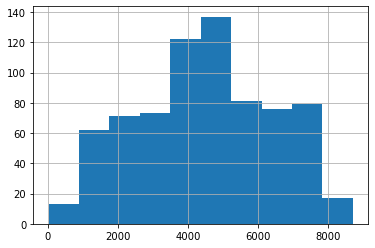

In [189]:
data['cnt'].hist();

In [190]:
pd.DataFrame(linreg.coef_ ,data.columns[:-1] , columns=['coef_regression']).sort_values(by='coef_regression',
                                                                                       ascending=False)

,coef_regression
windspeed(ms),3.050517e+12
yr,9.540697e+02
atemp,8.911769e+02
season,4.048590e+02
weekday,1.037111e+02
temp,6.248087e+01
mnth,3.080806e+01
workingday,1.470160e+01
holiday,-6.757441e+01
hum,-1.589767e+02


# Lasso

In [191]:
lasso.fit(X_train_scaler,y_train)

Lasso(random_state=17)

In [192]:
mean_squared_error_lasso = np.sqrt(mean_squared_error(y_valid,lasso.predict(X_valid_scaler)))
mean_squared_error_lasso

1120.7214094932299

In [193]:
pd.DataFrame(lasso.coef_, data.columns[:-1], columns=['coef_regression_lasso']).sort_values(by='coef_regression_lasso',
                                                                                       ascending=False)

,coef_regression_lasso
yr,952.804560
atemp,877.159813
season,403.416439
weekday,102.643044
temp,75.953962
mnth,29.857599
workingday,14.173377
windspeed(ms),-0.000000
holiday,-67.073435
hum,-157.547615


# Lasso_cv

In [194]:
lasso_cv.fit(X_train_scaler,y_train)

LassoCV(random_state=17)

In [195]:
mean_squared_error_lasso_cv = np.sqrt(mean_squared_error(y_valid,lasso_cv.predict(X_valid_scaler)))
mean_squared_error_lasso_cv

1120.7436606195304

In [196]:
pd.DataFrame(lasso_cv.coef_, data.columns[:-1], columns=['coef_regression_lasso_cv']).sort_values(by='coef_regression_lasso_cv',
                                                                                                 ascending=False)

,coef_regression_lasso_cv
yr,951.135002
atemp,883.344030
season,403.009581
weekday,101.892690
temp,69.238981
mnth,28.608639
workingday,13.478682
windspeed(ms),-0.000000
holiday,-66.360460
hum,-156.248289


# Ridge

In [197]:
ridge.fit(X_train_scaler,y_train)

Ridge(random_state=17)

In [198]:
mean_squared_error_ridge = np.sqrt(mean_squared_error(y_valid,ridge.predict(X_valid_scaler)))
mean_squared_error_ridge

1119.5605202108366

In [199]:
pd.DataFrame(ridge.coef_,data.columns[:-1],columns=['coef_regression_ridge']).sort_values(by='coef_regression_ridge',
                                                                                         ascending=False)

,coef_regression_ridge
yr,954.075878
atemp,730.747340
season,400.114172
temp,221.406072
weekday,103.198680
mnth,34.687740
workingday,15.334339
holiday,-69.046689
windspeed(ms),-95.819798
windspeed(mph),-95.819798


# Ridge_cv

In [200]:
ridge_cv.fit(X_train_scaler,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [201]:
mean_squared_error_ridge_cv = np.sqrt(mean_squared_error(y_valid,ridge_cv.predict(X_valid_scaler)))
mean_squared_error_ridge_cv

1118.903543322007

In [202]:
pd.DataFrame(ridge_cv.coef_,data.columns[:-1],columns=['coef_regression_ridge_cv']).sort_values(by='coef_regression_ridge_cv',
                                                                                               ascending=False)

,coef_regression_ridge_cv
yr,934.401985
atemp,534.482125
temp,410.485392
season,375.585733
weekday,100.838401
mnth,48.142392
workingday,16.165284
holiday,-70.019251
windspeed(ms),-97.770430
windspeed(mph),-97.770430


# RandomForestRegressor(n_estimators=500)

In [203]:
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=17)

In [204]:
mean_squared_error_forest = np.sqrt(mean_squared_error(y_valid,forest.predict(X_valid)))
mean_squared_error_forest

1046.9607717751937

In [205]:
pd.DataFrame(forest.feature_importances_, data.columns[:-1], columns=['importance_feature']).sort_values(by='importance_feature',
                                                                                                        ascending=False)

,importance_feature
temp,0.298609
atemp,0.243309
yr,0.199314
hum,0.070565
season,0.062295
weathersit,0.030535
mnth,0.027786
windspeed(mph),0.020349
weekday,0.019819
windspeed(ms),0.019613


# Сравнение моделей регресии

In [206]:
arr_mean_squared_error = np.array([mean_squared_error_linreg,mean_squared_error_lasso,
                                   mean_squared_error_lasso_cv,mean_squared_error_ridge,
        mean_squared_error_ridge_cv,mean_squared_error_forest])
arr_mean_squared_error

array([1121.7952668 , 1120.72140949, 1120.74366062, 1119.56052021,
       1118.90354332, 1046.96077178])

In [207]:
index = ['linreg','lasso','lasso_cv','ridge','ridge_cv','forest']

In [208]:
data_MSE = pd.DataFrame(arr_mean_squared_error,index = index, columns=['MSE']).sort_values(by='MSE',ascending=True)
data_MSE

,MSE
forest,1046.960772
ridge_cv,1118.903543
ridge,1119.560520
lasso,1120.721409
lasso_cv,1120.743661
linreg,1121.795267


<AxesSubplot:>

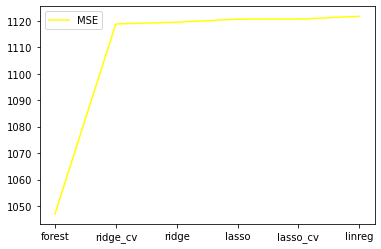

In [209]:
data_MSE.plot(color='yellow')